<a href="https://colab.research.google.com/github/amandaswens/DSPS_ASwenson/blob/main/HW8/HW8_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint

In [ ]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Remember tasks are not completed if you do not comment on the results and include captions

# Task 1 : data ingestion

- Download the Higgs boson data from Kaggle (programmatically within the notebook)

see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)


In [ ]:
...

Ellipsis

In [ ]:
drive.mount("/content/gdrive")

# Change directory to Google Drive's "My Drive" yfolder
%cd /content/gdrive/My\ Drive/

# Verify that kaggle.json exists (should output "kaggle.json" if present)
!ls kaggle.json

# Restrict permissions of kaggle.json to owner-only (read/write)
!chmod 600 kaggle.json

with open("kaggle.json", "r") as file:
    envs = json.load(file)
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']  # Use envs['key'] instead of hardcoding

Mounted at /content/gdrive
/content/gdrive/My Drive
kaggle.json


In [ ]:
! kaggle competitions download -c higgs-boson

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Create a directory in your Google Drive to store the data
data_dir = "/content/gdrive/My Drive/dsps/higgs_boson_data"
os.makedirs(data_dir, exist_ok=True)

In [ ]:
! kaggle competitions download -c higgs-boson -p "{data_dir}"

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
replace random_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: random_submission.zip   
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.zip                
replace training.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.zip            


In [ ]:
#use the training dataset and make your own trainng test set later
higgsdata = pd.read_csv("training.zip")

# Task 2: data exploration

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
higgsdata.columns.tolist()


['EventId',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'Weight',
 'Label']

In [ ]:
higgsdata['Label'].unique()


array(['s', 'b'], dtype=object)

In [ ]:
higgsdata["Label"] = higgsdata['Label'].map({'s':1, 'b':0})

higgsdata.replace(-999.0, np.nan, inplace = True)

higgsdata.fillna(higgsdata.median(), inplace = True)

print(higgsdata.isnull().sum().sum(), "missing values left")

0 missing values left


In [ ]:
labels = higgsdata['Label']

weights = higgsdata["Weight"]

do everything else you need to explore the data.... (I can think of 4 more things we have done together)

In [ ]:
X = higgsdata.drop(columns=['Label', "Weight", 'EventId'])
y = higgsdata['Label']

**Comments**: To clean the data, I did what we normally do - analyze the data using .head() and .describe() to see what we are looking at. I noticed there were many "-999.0" values that popped up when using .describe() which indicates missing values. I replaced them with NaN and then filled those values in with the median of each column that way the model does not interpret the -999.0 as a real number. Then I split the features and the labels into x and y.

# Task 3: data preparation


- Read in the trainind data. Extract the target variables. Split the provided training data into a training and a test set.

The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data (along any other variable you should remove) and create a separate variable `labels` and a separate variable `weights`, which will be your target variables for, respectively, classification and regression.



 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf): find the corresponding columns of the DF and save them as labels and weights respectively

In [ ]:
# already did what i needed to do above.

In [ ]:
labels # 's' stands for signal, 'b' for background. You want to find new particles, i.e. "signal"

,Label
0,1
1,0
2,0
3,0
4,0
...,...
249995,0
249996,0
249997,1
249998,0


In [ ]:
weights # the weight of the particle

,Weight
0,0.002653
1,2.233584
2,2.347389
3,5.446378
4,6.245333
...,...
249995,4.505083
249996,2.497259
249997,0.018636
249998,1.681611


use the "training.csv" file, but create your own train/test sets

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, labels, test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
train_regress_x, test_regress_x, train_regress_y, test_regress_y = train_test_split(X, weights, test_size = 0.2, random_state = 42)

In [ ]:
'Label' in X.columns

False

#Task 4: answer the question (you, not an AI...) why did I not ask you to scale the data like we did in the cluster models?

**Response**: You didn't ask us to scale the data like we have done before because clusters rely on distances, but the data we are using here is a tree. A tree is based on features rather than distances, therefore scaling the data would not be useful as the results wouldn't change.

# Task 5: tree-based classifications

Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the `label` of the particles, i.e. if a particle is `Signal` or `Background`. Get the score of each model on both the training and test set, compare them training and test results and comment on the result for each model (adjust the hyperparameters if you need to)


In [ ]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#now control some hyperparameters
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
rf.fit(train_x, train_y)

y_train_pred = rf.predict(train_x)
y_test_pred = rf.predict(test_x)

print('Train accuracy:', accuracy_score(train_y, y_train_pred))
print("Test accurcy:", accuracy_score(test_y, y_test_pred))


Train accuracy: 0.822255
Test accurcy: 0.8191


In [ ]:
gbt = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
gbt.fit(train_x, train_y)

gbt_train_pred = gbt.predict(train_x)
gbt_test_pred = gbt.predict(test_x)

print('Train accuracy:', accuracy_score(train_y, gbt_train_pred))
print("Test accuracy:", accuracy_score(test_y, gbt_test_pred))


Train accuracy: 0.839215
Test accuracy: 0.8342


# Task 6: model evaluation

calculate the  scores for the training and test sets and compare etc

In [ ]:
print(f"the RF scores on the training test is 0.822255, on the test is 0.8191")
print("this indicates that the RF model is not overfitting and the model generalizes well.")
print(f"the GBT scores on the training test is 0.839215, on the test is 0.8342")
print("this indicates that the same as the RF model, the GBT model is not overfitting and the model generalizes well.")


the RF scores on the training test is 0.822255, on the test is 0.8191
this indicates that the RF model is not overfitting and the model generalizes well.
the GBT scores on the training test is 0.839215, on the test is 0.8342
this indicates that the same as the RF model, the GBT model is not overfitting and the model generalizes well.


**Comment** is your model performing well? is it .... overfitting?

Yes. The model is performing well and is not overfitting. I know thie due to the almost-exact train and test scores.

- Produce a confusion matrix for each model and compare them






In [ ]:
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix, make sure you pass appropriate label

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='', labels=["P", "N"],
                          cmap=plt.cm.bone):
    """
    Plots a confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        normalize (bool, optional): If True, normalize the confusion matrix. Defaults to False.
        title (str, optional): Title of the plot. Defaults to ''.
        labels (list, optional): List of labels for the classes. Defaults to ["P", "N"].
        cmap (matplotlib.colors.Colormap, optional): Colormap for the plot. Defaults to plt.cm.bone.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'
    # Compute confusion matrix
    if normalize:
      cm = confusion_matrix(y_true, y_pred, normalize='all')
    else:
      cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(np.rot90(cm), cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=labels[::-1])

    plt.text(0,1, cm[0,0], ha='center', c="k" if cm[0,0] > 0.1 * cm.sum() else "w")
    plt.text(0,0, cm[0,1], ha='center', c="k" if cm[0,1] > 0.1 * cm.sum() else "w")
    plt.text(1,1, cm[1,0], ha='center', c="k" if cm[1,0] > 0.1 * cm.sum() else "w")
    plt.text(1,0, cm[1,1], ha='center', c="k" if cm[1,1] > 0.1 * cm.sum() else "w")
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=labels)
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)

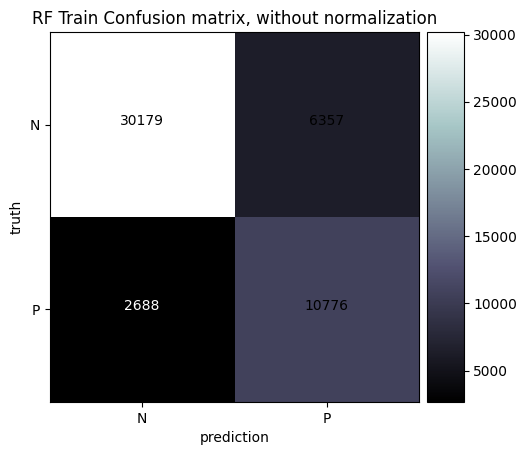

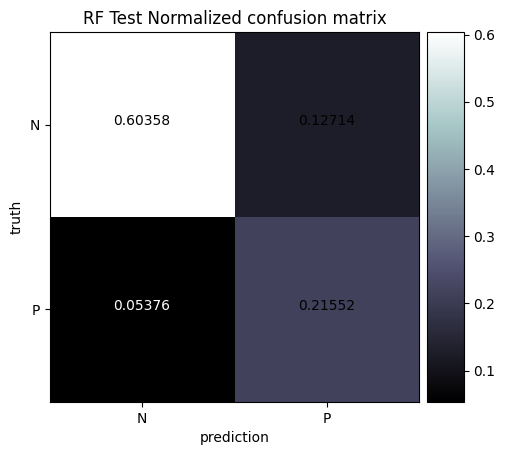

In [ ]:
#for RF
plot_confusion_matrix(test_y, y_test_pred, normalize = False, title = "RF Train")
plot_confusion_matrix(test_y, y_test_pred, normalize = True, title = "RF Test")

**CAPTION**: Above are two plots - both plot the confusion matrix for the RF model, however one is normalized (bottom) and one is not (top). The model does a good job at identifying most background events (N) and signal events (P) with a considerable amount of false postivies and negatives. The normalized matrix for the test data indicates that about 60% of all predictions are classified as background and 22% as signal which suggests that the model performs well but is slightly better at recognizing background events.

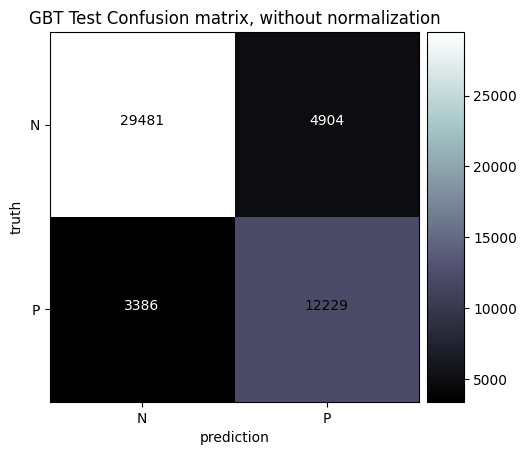

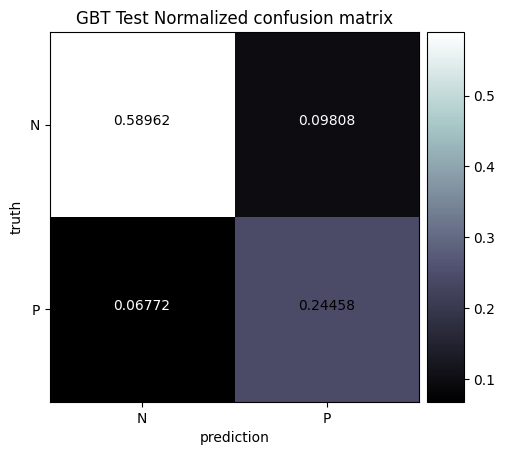

In [ ]:
plot_confusion_matrix(test_y, gbt_test_pred, normalize = False, title = "GBT Test")
plot_confusion_matrix(test_y, gbt_test_pred, normalize = True, title = 'GBT Test')

**CAPTION:** Above are two more confusion matrices except this time it is for the GBT model. The top plot is not normalized and the bottom one is normalized. The results tell us that the model does a good job at identifying the background particles (the true negatives) and signal particles (true positives) with the presented numbers close to the test data. Though it also predicts a good amount of false positives - 4904, and false negatives - 3,386 suggesting the GBT performs slightly better than the RF model but still amkes more false positives than false negatives.

Plot a simple ROC curve for the RF and GBT models  a d describe it in a caption.

In [ ]:
#this will be passed to the ROC function
test_y.reshape(-1, 1).flatten() == "s"

# i changed s to 0 and b to 1 so I'm skipping this step.

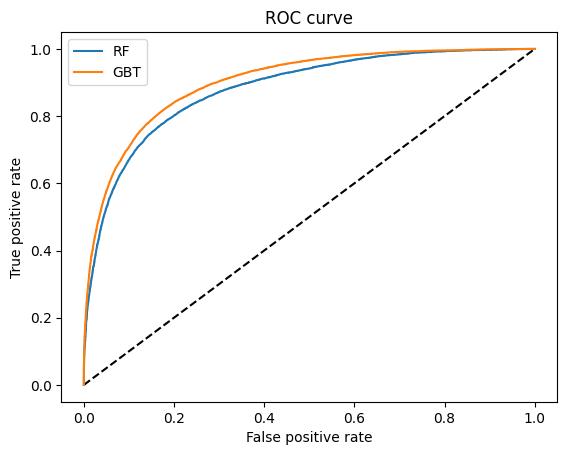

In [ ]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y, y_pred_grd_gbtcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


**CAPTION**: Above is a plot of an ROC curve. This ROC curve compares how well the RF (Random Forest) and Gradient Boosted Trees (GBT) models separate signal from background particles. Both models do pretty well given their curves are above the diagnoal line (which represents random guessing), though the GBT curve is slightly above the RF implying it is the more accurate classifier.

#Task 7 required for 661, EC for 461, tree-based regression


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [ ]:
rfR = RandomForestRegressor(max_depth=3, random_state=302)
rfR.fit(train_regress_x, train_regress_y)
gbtR = GradientBoostingRegressor(max_depth=3, random_state=302)
gbtR.fit(train_regress_x, train_regress_y)

GradientBoostingRegressor(random_state=302)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:
def L1(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)
def L2(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)

In [ ]:

print(f"L1 RF {L1(test_regress_y,  rfR.predict(test_regress_x)):.2f}, L2 RF {L2(test_regress_y, rfR.predict(test_regress_x)):.2f}")

L1 RF 1.00, L2 RF 1.83


In [ ]:
print(f"L1 GBT {L1(test_regress_y,  gbtR.predict(test_regress_x)):.2f}, L2 GBT {L2(test_regress_y, gbtR.predict(test_regress_x)):.2f}")

L1 GBT 0.84, L2 GBT 1.36


**Discuss!**

Given the results of the calculation it seems the GBT model performed better than the RF model for both the L1 and L2 loss. GBT had lower errors (L1 = 0.84, L2 = 1.36) compared to the RF (L1 = 1, L2 = 1.83), which means GBT's predictions were more accurate overall. This result is not very surprising given the conclusion I made before when discussing the confusion matricies/ROC curve - GBT is favorable!

#Task 8: Choose between feature importance and grid optimization (due for both 461 and 661)







# Task 8a: feature importance
Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/Labs/DSPS_2025_titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

(your features may looks slightly different than mine)

In [ ]:
feature_names = train_x.columns

print("RF Feature Importance:")
for f, fi in zip(feature_names, rf.feature_importances_):
  print(f"{f}: {fi:.3f}")

RF Feature Importance:
DER_mass_MMC: 0.221
DER_mass_transverse_met_lep: 0.223
DER_mass_vis: 0.108
DER_pt_h: 0.015
DER_deltaeta_jet_jet: 0.040
DER_mass_jet_jet: 0.023
DER_prodeta_jet_jet: 0.029
DER_deltar_tau_lep: 0.035
DER_pt_tot: 0.005
DER_sum_pt: 0.017
DER_pt_ratio_lep_tau: 0.051
DER_met_phi_centrality: 0.071
DER_lep_eta_centrality: 0.028
PRI_tau_pt: 0.078
PRI_tau_eta: 0.001
PRI_tau_phi: 0.000
PRI_lep_pt: 0.006
PRI_lep_eta: 0.002
PRI_lep_phi: 0.000
PRI_met: 0.019
PRI_met_phi: 0.000
PRI_met_sumet: 0.003
PRI_jet_num: 0.009
PRI_jet_leading_pt: 0.005
PRI_jet_leading_eta: 0.002
PRI_jet_leading_phi: 0.000
PRI_jet_subleading_pt: 0.001
PRI_jet_subleading_eta: 0.001
PRI_jet_subleading_phi: 0.000
PRI_jet_all_pt: 0.008


In [ ]:
indices = np.argsort(rf.feature_importances_)[-4:][::-1]

best_features = [train_x.columns[i] for i in indices]
print(best_features)

['DER_mass_transverse_met_lep', 'DER_mass_MMC', 'DER_mass_vis', 'PRI_tau_pt']


In [ ]:
higgsdata.drop(["EventId", "Label", "Weight"], axis=1).iloc[:, best_features_index[::-1]] #this sorts the data by feature

,PRI_tau_pt,DER_mass_vis,DER_mass_MMC,DER_mass_transverse_met_lep
0,32.638,97.827,138.470,51.655
1,42.014,103.235,160.937,68.768
2,32.154,125.953,112.406,162.172
3,22.647,80.943,143.905,81.417
4,28.209,134.805,175.864,16.915
...,...,...,...,...
249995,24.754,36.548,112.406,71.989
249996,23.416,68.083,112.406,58.179
249997,35.636,75.839,105.457,60.526
249998,27.944,68.812,94.951,19.362


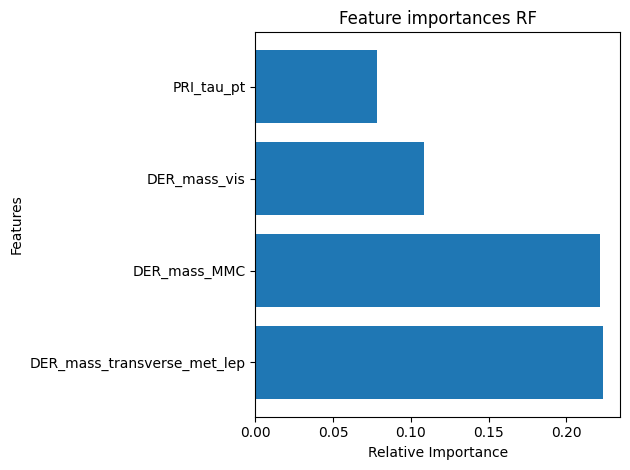

In [ ]:
plt.figure()
plt.title("Feature importances RF")
plt.barh(
    range(len(indices)),
    rf.feature_importances_[indices],
    align='center'
)

plt.yticks(range(len(indices)), [train_x.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

**CAPTION:** This bar chart shows that DER_mass_transverse_met_lep and DER_mass_MMC are the two most influential features in predicting the signal vs. background, followed by DER_mass_vis and PRI_tau_pt for the RF model. These features are all related to reconstructed particle masses or tau momentum (according to Google and GPT) that help distingusih real Higgs-like events from background noise.

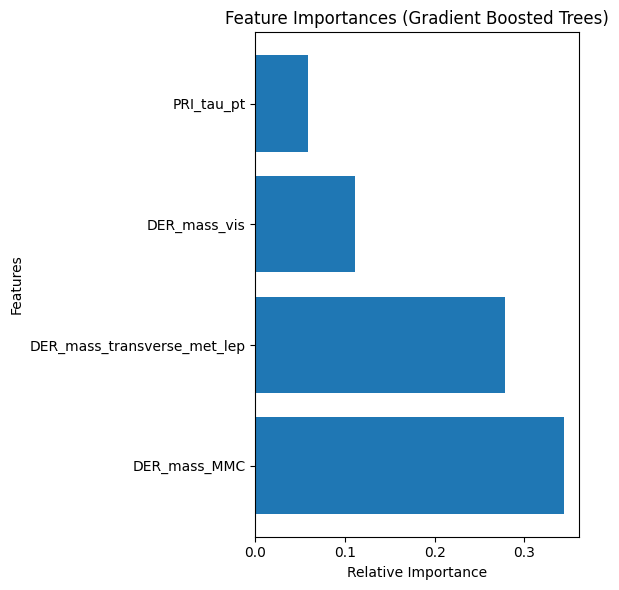

In [ ]:
gbt_indices = np.argsort(gbt.feature_importances_)[-4:][::-1]

plt.figure(figsize=(6,6))
plt.title("Feature Importances (Gradient Boosted Trees)")

plt.barh(range(len(gbt_indices)),
         gbt.feature_importances_[gbt_indices],
         align='center')

plt.yticks(range(len(gbt_indices)), [train_x.columns[i] for i in gbt_indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

**CAPTION**: Above is another bar chart. This chart highlights that DER_mass_MMC and DER_mass_transverse_met_lep contribute most to the model’s predictive power, followed by DER_mass_vis and PRI_tau_pt.These features, again, are all tied to reconstructed mass and particle momentum which help with indicating signal events in particle collision data (according to Google). Compared to the RF model, GBT places a greater emphasis on mass-related variables which may explain why it performed slightly better than the RF model in this case.

# Task 8b: hyperparameters grid search
- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [ ]:
# choose your preferred values for the parameters you will test

top_features = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
                'DER_mass_vis', 'PRI_tau_pt']

X_top = higgsdata[top_features]
y = higgsdata['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42)

random_grid = {
    'n_estimators': [10, 100],
    'max_depth': [3, 10, None],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None]
}


In [ ]:
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['sqrt', 'log2', None],
 'n_estimators': [10, 100]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
random_search.fit(train_x[::5], train_y[::5])
# subselecting every 5th observation to reduce the computational time

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=6,
                                                    n_estimators=200, n_jobs=-1,
                                                    random_state=42),
                   n_iter=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [10, 100]})

In [ ]:
random_search.best_estimator_

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
for k in random_search.best_params_:
  print(k,random_search.best_params_[k])

n_estimators 100
max_features sqrt
max_depth None
bootstrap True


In [ ]:
rf = RandomForestClassifier(**random_search.best_params_)
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
rf.fit(train_x, train_y)

RandomForestClassifier()

In [ ]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(rf.score(test_x, test_y)))


Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best score is 0.83708


In [ ]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.207964,0.267295,0.42776,0.144032,100,sqrt,None,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.829084,0.837771,0.834021,0.833625,0.003558,1


Plot a simple  ROC curve for the RF model with the best parameters found in the previous step. Describe it. Compare it with the GBT model from before

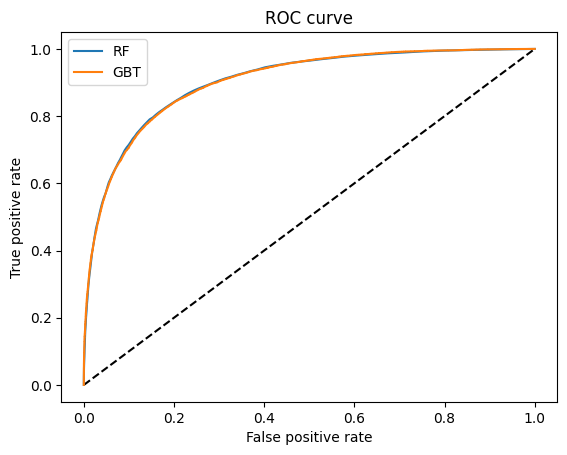

In [ ]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y, y_pred_grd_gbtcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**CAPTION:** This plot compares the performance of the RF and the GBT models using a ROC curve again. This time, the GBT and RF models perform the same - both extremely well, neither is outperforming eachother unlike last time (where the GBT model did a bit better than the RF model). This result suggests that the hyperparmeterization helped the RF model catch uo to the GBT reducing the performance gap.